In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-forecasting/train.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

# **Importing Dataset**

In [4]:
df=pd.read_csv("/kaggle/input/sales-forecasting/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## EDA

In [5]:
df.shape

(9800, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
df.dropna(subset = ['Postal Code']) 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [9]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [10]:
df['Product Name'].value_counts()

Product Name
Staple envelope                                                        47
Staples                                                                46
Easy-staple paper                                                      44
Avery Non-Stick Binders                                                20
Staples in misc. colors                                                18
                                                                       ..
Xiaomi Mi3                                                              1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream     1
Socket Bluetooth Cordless Hand Scanner (CHS)                            1
Logitech Illuminated Ultrathin Keyboard with Backlighting               1
LG G2                                                                   1
Name: count, Length: 1849, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   
df['order_day'] = df['Order Date'].dt.day
df['ship_day'] = df['Ship Date'].dt.day
df['order_year'] = df['Order Date'].dt.year
df['ship_year'] = df['Ship Date'].dt.year
df['Fulfillment_Time'] = df['Ship Date'] - df['Order Date']
df['Fulfillment_Time'] = df['Fulfillment_Time'].dt.days
df['year_month']= df['Order Date'].apply(lambda x: x.strftime("%Y-%m"))

# Data Visualization

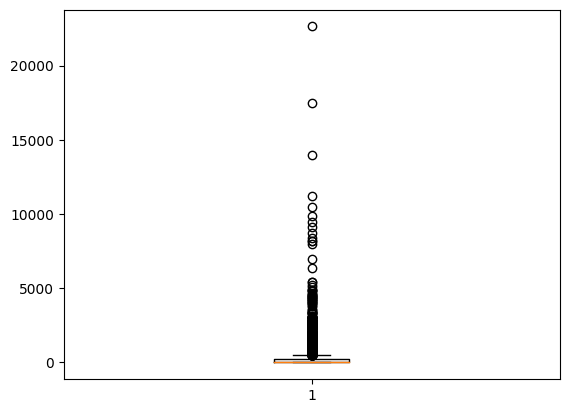

In [25]:
# Creating plot
plt.boxplot(df['Sales'])
 
# show plot
plt.show()

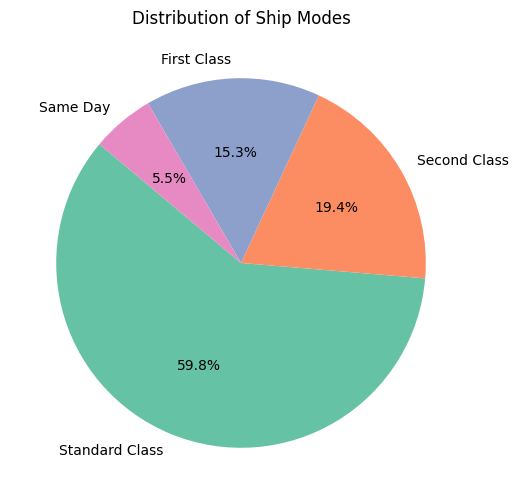

In [14]:
ship_mode_counts = df['Ship Mode'].value_counts()

plt.figure(figsize=(8, 6))
ship_mode_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Ship Modes')
plt.ylabel('')
plt.show()

In [15]:
prod = df[['Category', 'Sub-Category', 'Product Name', 'Sales', 'order_year']]

fig = px.sunburst(
    prod, path=["Category", "Sub-Category"], values="Sales",
    color="Category",
    title="Sales by Category and Subcategory",
    width = 600,
    height = 600
)

fig.show()

In [16]:
cust = df[['Order ID','Customer ID', 'Segment', 'Ship Mode', 'State', 'Sales', 'order_year', 'Order Date']]

In [17]:
state_sales = cust.groupby(['State'])['Sales'].sum().sort_values(ascending=False).head(10)

fig = go.Figure(data=[go.Pie(labels=state_sales.index, values=state_sales.values)])
fig.update_traces(textposition='inside', textinfo='percent+label')


1. We can clearly see that the Technology category is the most popular of all three categories and has achieved the highest sales over the years despite having only two subcategories.
2. In contrast, “Office Supplies” has the most subcategories but still has the lowest sales.
Taking into account our new Fulfillment_Time feature, we can see that 2018 was the best year as this year saw the fastest shipments for most products.
3. “Tech” and “Furniture” also had very good delivery speeds.
4. We can see that most customers prefer standard shipping over first class or same day delivery. This means that we can focus on targeted promotions and monitor customer behavior to analyze the reasons for choosing this method, such as: B. Cost sensitivity, product urgency, regional distribution.

# Trends 

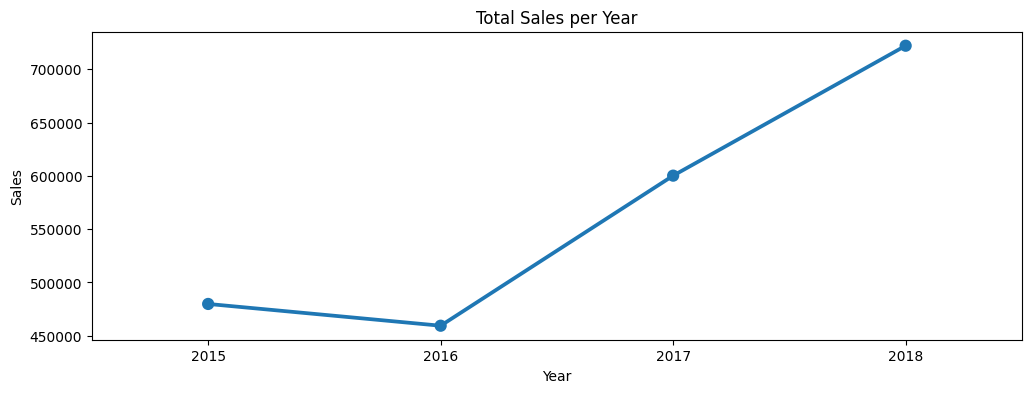

In [18]:
numeric_columns = df.select_dtypes(include=['number']).columns
a = df.groupby('order_year')[numeric_columns].sum()
plt.figure(figsize=(12, 4))
sns.pointplot(x= a.index, y='Sales', data=a)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")

plt.show()

In [19]:
a

,Row ID,Postal Code,Sales,order_day,ship_day,order_year,ship_year,Fulfillment_Time
order_year,,,,,,,,
2015,9508700,110842145.0,479856.2081,30706,31147,3935295,3935346,7804
2016,9948341,108836271.0,459436.0054,32444,33235,4142880,4142903,8294
2017,12254092,138178437.0,600192.5500,38533,40069,5111078,5111111,9998
2018,16313767,183213700.0,722052.0192,50088,51328,6574644,6574686,12723


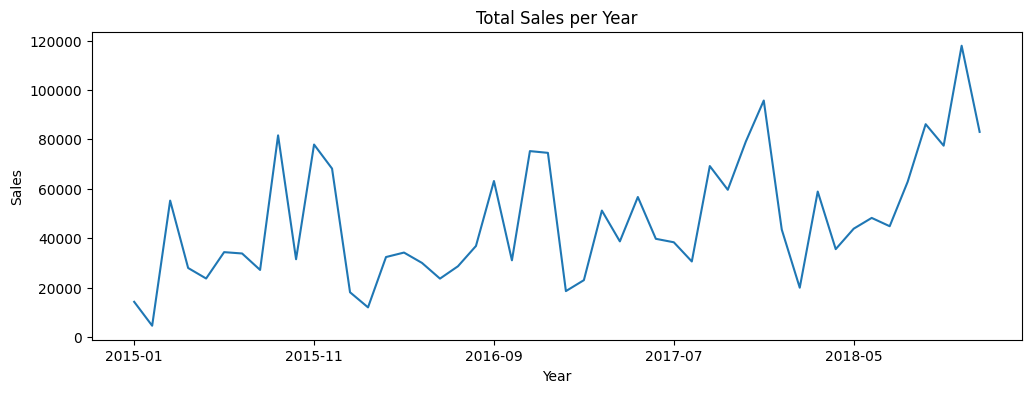

In [20]:
numeric_columns = df.select_dtypes(include=['number']).columns
a= pd.DataFrame(df.groupby('year_month')[numeric_columns].sum())['Sales']

plt.figure(figsize=(12, 4))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")
plt.show()


In [21]:
a.head()

year_month
2015-01    14205.707
2015-02     4519.892
2015-03    55205.797
2015-04    27906.855
2015-05    23644.303
Name: Sales, dtype: float64

# Model Building

In [31]:
# importing libraries
from xgboost import XGBRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error


In [22]:
df= df.drop(["Row ID","Order ID","Customer ID","Product ID"],axis=1)

In [23]:
from sklearn.model_selection import train_test_split

x = df.drop('Sales', axis=1)
y = df['Sales']

## XGBoost

In [30]:
# Select only numeric columns for the groupby operation
numeric_columns = df.select_dtypes(include=['number']).columns
xgb_sales = pd.DataFrame(df.groupby(by=['Order Date'])[numeric_columns].sum())

x = xgb_sales.drop('Sales', axis=1)
y = xgb_sales['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

model = XGBRegressor(learning_rate=0.03, max_depth=1,)
model.fit(x_train, y_train)

preds = model.predict(x_test)
rmse_xgb = sqrt(mean_squared_error(y_test, preds))
model_score = model.score(x_test, y_test)

print("Root Mean Squared Error for XGBoost:", rmse_xgb)
print("Model Score:", model_score)

Root Mean Squared Error for XGBoost: 1736.1252260324954
Model Score: 0.3535027271635972


## Random Forest Regressor

In [32]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming x and y are defined from your previous preprocessing steps

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on test data
preds = rf_model.predict(x_test)

# Calculate evaluation metrics
rmse_rf = sqrt(mean_squared_error(y_test, preds))
mae_rf = mean_absolute_error(y_test, preds)
r2_rf = r2_score(y_test, preds)

# Print evaluation metrics
print("Root Mean Squared Error for Random Forest:", rmse_rf)
print("Mean Absolute Error for Random Forest:", mae_rf)
print("R-squared for Random Forest:", r2_rf)


Root Mean Squared Error for Random Forest: 1595.0096772787545
Mean Absolute Error for Random Forest: 1076.4013774634145
R-squared for Random Forest: 0.2621827212519632


## Comparing Result

In [34]:
cust['latest_order_year'] = cust.groupby('Customer ID')['order_year'].transform('max')

cust['churn'] = (cust['order_year'] != cust['latest_order_year'])
churn_rate = cust[cust['churn'] == True].shape[0] / len(cust)
pct = churn_rate * 100

print(f"Churn Rate: {pct:.2f} % ")

Churn Rate: 62.56 % 


In [35]:
total_revenue = cust['Sales'].sum()
total_customers = len(cust['Sales'].unique())
RPU = total_revenue / total_customers
print(RPU)

392.8325139308668


In [33]:
result = pd.DataFrame([[rmse_xgb], [rmse_rf ]], columns=['RMSE'], index=['XGBRegressor','RandomForest'])
result

,RMSE
XGBRegressor,1736.125226
RandomForest,1595.009677
